# Multimodal Single-Cell🧬IIntegration: EDA 🔍 & simple predictions

In [1]:
! pip install -q tables

In [2]:
%matplotlib inline

import os
import torch
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

PATH_DATASET = "/kaggle/input/open-problems-multimodal"

# Browsing the matadata

In [3]:
df_meta = pd.read_csv(os.path.join(PATH_DATASET, "metadata.csv")).set_index("cell_id")
display(df_meta.head())

print(f"table size: {len(df_meta)}")

,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


table size: 281528


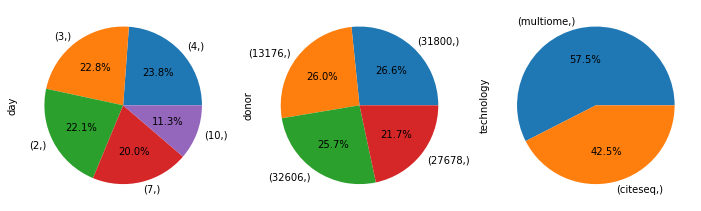

In [4]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
for i, col in enumerate(["day", "donor", "technology"]):
    _= df_meta[[col]].value_counts().plot.pie(ax=axarr[i], autopct='%1.1f%%', ylabel=col)

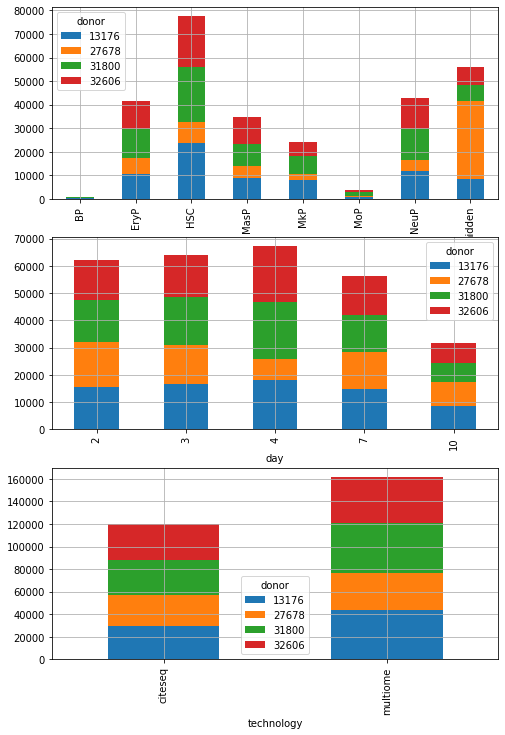

In [5]:
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
for i, col in enumerate(["cell_type", "day", "technology"]):
    _= df_meta.groupby([col, 'donor']).size().unstack().plot(ax=axarr[i], kind='bar', stacked=True, grid=True)

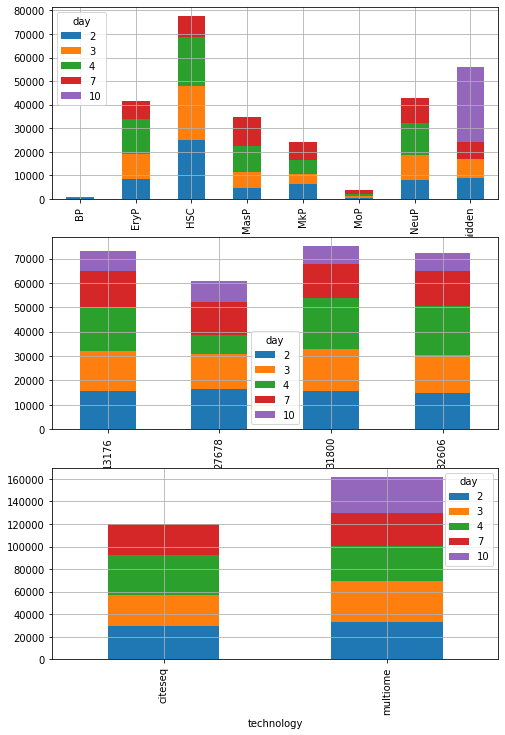

In [6]:
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
for i, col in enumerate(["cell_type", "donor", "technology"]):
    _= df_meta.groupby([col, 'day']).size().unstack().plot(ax=axarr[i], kind='bar', stacked=True, grid=True)

# Browse the train dataset

In [7]:
df_cite = pd.read_hdf(os.path.join(PATH_DATASET, "train_cite_inputs.h5")).astype(np.float16)
cols_source = list(df_cite.columns)
display(df_cite.head())

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.089844,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,...,0.0000,0.000000,0.000000,4.039062,0.0,0.0,0.000000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847656,0.0000,3.847656,3.847656,0.0,...,0.0000,0.000000,3.847656,4.531250,0.0,0.0,0.000000,3.847656,3.847656,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.4375,3.437500,0.000000,0.0,...,3.4375,0.000000,4.113281,5.019531,0.0,0.0,0.000000,3.437500,4.113281,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,4.195312,0.000000,0.0,...,0.0000,4.195312,4.195312,4.195312,0.0,0.0,3.519531,4.195312,3.519531,0.0


In [8]:
df = pd.read_hdf(os.path.join(PATH_DATASET, "train_cite_targets.h5")).astype(np.float16)
cols_target = list(df.columns)
display(df.head())

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167969,0.622559,0.106934,0.324951,3.332031,6.425781,1.480469,-0.728516,-0.468750,-0.073303,...,-0.448486,3.220703,-0.533203,0.674805,-0.006187,0.682129,1.398438,0.414307,1.780273,0.547852
d02759a80ba2,0.818848,0.505859,1.079102,6.847656,3.525391,5.281250,4.929688,2.070312,0.333740,-0.468018,...,0.323730,8.406250,0.131348,0.047607,-0.243652,0.547852,1.833008,0.982422,2.736328,2.183594
c016c6b0efa5,-0.356689,-0.422363,-0.824707,1.137695,0.519043,7.222656,-0.375000,1.738281,0.142944,-0.971680,...,1.348633,4.886719,-0.279541,-0.131104,-0.177612,-0.688965,9.015625,-1.182617,3.958984,2.869141
ba7f733a4f75,-1.201172,0.149170,2.023438,6.023438,7.257812,2.792969,21.703125,-0.137939,1.650391,-0.754883,...,1.504883,12.390625,0.511230,0.587891,-0.752441,1.714844,3.894531,1.799805,1.537109,4.406250
fbcf2443ffb2,-0.100403,0.697266,0.625977,-0.298340,1.370117,3.253906,-1.659180,0.643555,0.902832,1.291992,...,0.776855,6.496094,0.279785,-0.841797,-0.869629,0.675293,5.257812,-0.835449,9.632812,1.765625


In [9]:
df_cite = df_cite.join(df, how='right')
df_cite = df_cite.join(df_meta, how="left")
del df

print(f"total: {len(df_cite)}")
print(f"cell_id: {len(df_cite)}")
display(df_cite.head())

total: 70988
cell_id: 70988


,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,CD328,HLA-E,CD82,CD101,CD88,CD224,day,donor,cell_type,technology
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,...,-0.006187,0.682129,1.398438,0.414307,1.780273,0.547852,2,32606,HSC,citeseq
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,...,-0.243652,0.547852,1.833008,0.982422,2.736328,2.183594,2,32606,HSC,citeseq
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847656,0.0000,3.847656,3.847656,0.0,...,-0.177612,-0.688965,9.015625,-1.182617,3.958984,2.869141,2,32606,EryP,citeseq
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.4375,3.437500,0.000000,0.0,...,-0.752441,1.714844,3.894531,1.799805,1.537109,4.406250,2,32606,NeuP,citeseq
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,4.195312,0.000000,0.0,...,-0.869629,0.675293,5.257812,-0.835449,9.632812,1.765625,2,32606,EryP,citeseq


### Meta-data details

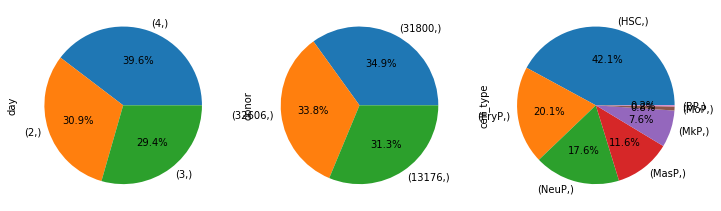

In [10]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, col in enumerate(["day", "donor", "cell_type"]):
    _= df_cite[[col]].value_counts().plot.pie(ax=axarr[i], autopct='%1.1f%%', ylabel=col)

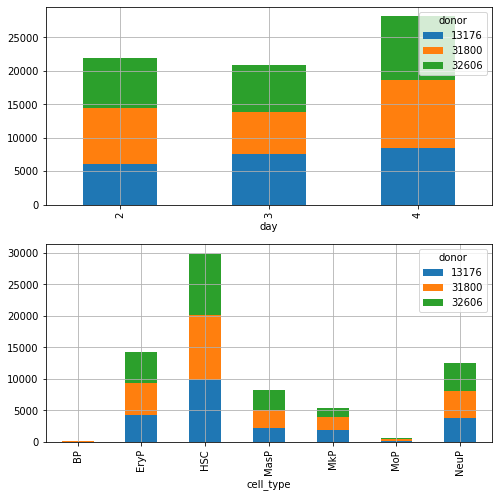

In [11]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for i, col in enumerate(["day", "cell_type"]):
    _= df_cite.groupby([col, 'donor']).size().unstack().plot(ax=axarr[i], kind='bar', stacked=True, grid=True)

In [12]:
del df_cite

## Just a fraction of Multi dataset

Note that this dataset is too large to be leaded directly in DataFrame and crashes on Kaggle kernel

In [13]:
display(pd.read_hdf(os.path.join(PATH_DATASET, "train_multi_inputs.h5"), start=0, stop=100).head())

gene_id,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
fc0c60183c33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9b4a87e22ad0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
81cccad8cd81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15cb3d85c232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [14]:
display(pd.read_hdf(os.path.join(PATH_DATASET, "train_multi_targets.h5"), start=0, stop=100).head())

gene_id,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,0.0,4.507936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


### Load all indexes from chunks

In [15]:
cell_id = []
for i in range(20):
    df = pd.read_hdf(os.path.join(PATH_DATASET, "train_multi_targets.h5"), start=i * 10000, stop=(i+1) * 10000)
    print(i, len(df), df["ENSG00000121410"].mean())
    if len(df) == 0:
        break
    cell_id += list(df.index)

df_multi_ = pd.DataFrame({"cell_id": cell_id}).set_index("cell_id")
display(df_multi_.head())

0 10000 0.6923781
1 10000 0.5256491
2 10000 0.46140882
3 10000 0.5632183
4 10000 0.58635724
5 10000 0.49829003
6 10000 0.38224626
7 10000 0.55561715
8 10000 0.4656229
9 10000 0.40620038
10 5942 0.2528025
11 0 nan


""
cell_id
56390cf1b95e
fc0c60183c33
9b4a87e22ad0
81cccad8cd81
15cb3d85c232


In [16]:
df_multi_ = df_multi_.join(df_meta, how="left")

print(f"total: {len(df_multi_)}")
print(f"cell_id: {len(df_multi_)}")
display(df_multi_.head())

total: 105942
cell_id: 105942


,day,donor,cell_type,technology
cell_id,,,,
56390cf1b95e,2,32606,NeuP,multiome
fc0c60183c33,2,32606,HSC,multiome
9b4a87e22ad0,2,32606,MasP,multiome
81cccad8cd81,2,32606,HSC,multiome
15cb3d85c232,2,32606,MkP,multiome


### Meta-data details

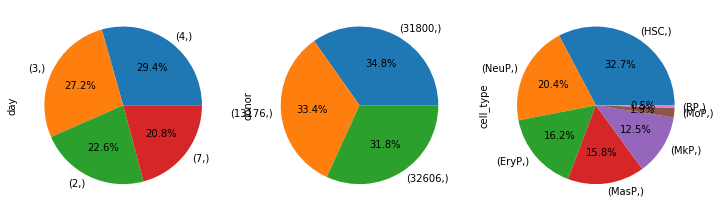

In [17]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, col in enumerate(["day", "donor", "cell_type"]):
    _= df_multi_[[col]].value_counts().plot.pie(ax=axarr[i], autopct='%1.1f%%', ylabel=col)

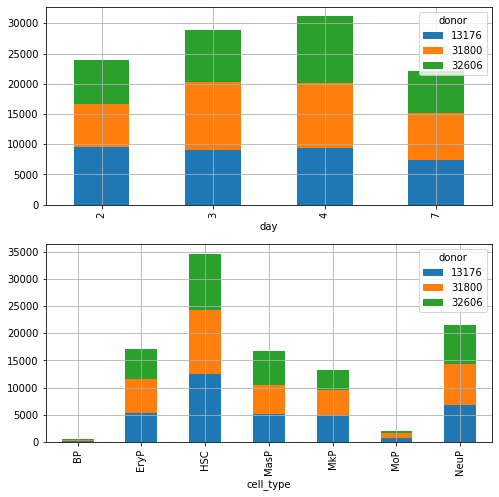

In [18]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for i, col in enumerate(["day", "cell_type"]):
    _= df_multi_.groupby([col, 'donor']).size().unstack().plot(ax=axarr[i], kind='bar', stacked=True, grid=True)

# Show Evaluation table

In [19]:
df_eval = pd.read_csv(os.path.join(PATH_DATASET, "evaluation_ids.csv")).set_index("row_id")
display(df_eval.head())

print(f"total: {len(df_eval)}")
print(f"cell_id: {len(df_eval['cell_id'].unique())}")
print(f"gene_id: {len(df_eval['gene_id'].unique())}")

,cell_id,gene_id
row_id,,
0,c2150f55becb,CD86
1,c2150f55becb,CD274
2,c2150f55becb,CD270
3,c2150f55becb,CD155
4,c2150f55becb,CD112


total: 65744180
cell_id: 65443
gene_id: 23558


**NOTE** that this evaluation expect you to run predictions on the both datasets: cite & multi (as you can see bellow)

target columns for:
- **cite**: 140 columns
- **multi**: 23418 columns

In [20]:
! head ../input/open-problems-multimodal/sample_submission.csv

row_id,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


# Statistic predictions 🏴‍ gene means

In [21]:
col_means = dict(pd.read_hdf(os.path.join(PATH_DATASET, "train_cite_targets.h5")).mean())

In [22]:
col_sums = []
count = 0
for i in range(20):
    df = pd.read_hdf(os.path.join(PATH_DATASET, "train_multi_targets.h5"), start=i * 10000, stop=(i+1) * 10000)
    count += len(df)
    if len(df) == 0:
        break
    col_sums.append(dict(df.sum()))

df_multi_ = pd.DataFrame(col_sums)
display(df_multi_)

,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
0,6923.780762,3104.725830,1671.604736,327.753937,372.148773,2591.509521,0.000000,712.247009,10643.770508,10703.525391,...,12571.205078,15855.628906,18120.527344,620.438538,1274.793335,24737.658203,141.673340,10071.977539,12365.707031,18497.628906
1,5256.490723,3529.119629,1729.573242,513.239624,305.512756,2582.471436,0.000000,1298.555176,7829.792969,14749.646484,...,11750.933594,14109.947266,12780.120117,386.500977,879.440613,27558.199219,175.154556,11997.994141,10448.703125,20945.449219
2,4614.088379,3412.395752,2152.993408,495.574493,359.089233,2478.895020,0.000000,1931.329834,6744.378418,15867.935547,...,9894.993164,12030.415039,11182.167969,444.179230,878.629211,29022.638672,147.953857,11261.978516,10893.356445,19692.878906
3,5632.183105,2756.912109,4061.179932,681.370300,304.626160,2363.782227,140.757889,1014.880005,8007.640625,11212.556641,...,10248.941406,11900.635742,15176.296875,385.157501,1103.150269,24085.250000,108.256195,9572.908203,11695.861328,17614.361328
4,5863.572266,2880.739258,5902.228027,1272.515259,483.854034,2855.998535,156.922348,589.985657,8535.837891,11389.197266,...,12039.349609,14028.998047,15110.402344,515.076904,1201.904541,25834.296875,103.339432,12419.794922,11095.833008,21104.464844
5,4982.900391,3190.299561,5147.796875,1484.682129,403.070648,2532.179443,37.558048,1001.204041,7322.268555,14046.611328,...,11767.343750,14704.515625,12887.257812,393.120514,1089.368896,29312.906250,103.371910,14661.896484,10195.340820,22382.667969
6,3822.462646,3085.723877,6719.854004,1376.666138,466.882874,2846.452148,82.566643,1326.494873,6355.787109,13509.080078,...,9270.826172,10580.503906,12654.649414,313.449677,923.395386,27365.072266,23.892361,11355.369141,13975.790039,22641.226562
7,5556.171387,3352.475586,1926.629395,685.871216,276.817413,2452.489502,14.136750,430.082947,10667.217773,10661.341797,...,12565.583984,15520.349609,16767.771484,488.938629,1286.208984,25064.605469,25.393122,11218.268555,11899.214844,19959.300781
8,4656.229004,3486.981689,2210.668945,774.137085,281.263763,2376.706299,61.009190,658.420227,7760.903320,13773.383789,...,11859.359375,14057.436523,13579.474609,439.047485,1085.235352,26650.080078,111.569832,13058.772461,9724.490234,22731.371094
9,4062.003662,3525.918213,1965.464844,937.223267,234.931427,2221.873291,0.000000,1091.389038,6691.244141,14469.314453,...,11646.608398,14313.873047,12247.660156,404.781067,887.561951,31109.363281,89.024361,14015.705078,9576.688477,23668.486328


In [23]:
col_means.update(dict(df_multi_.sum() / count))

## Map target to eval. table

In [24]:
df_eval["target"] = df_eval["gene_id"].map(col_means)
display(df_eval)

,cell_id,gene_id,target
row_id,,,
0,c2150f55becb,CD86,0.454768
1,c2150f55becb,CD274,0.466369
2,c2150f55becb,CD270,0.918049
3,c2150f55becb,CD155,5.610967
4,c2150f55becb,CD112,5.307707
...,...,...,...
65744175,2c53aa67933d,ENSG00000134419,6.693208
65744176,2c53aa67933d,ENSG00000186862,0.017530
65744177,2c53aa67933d,ENSG00000170959,0.040713


## Finalize submission

In [25]:
df_eval[["target"]].round(6).to_csv("submission.csv")

! ls -lh .
! head submission.csv

total 1.1G
---------- 1 root root 357K Aug 18 12:12 __notebook__.ipynb
-rw-r--r-- 1 root root 1.1G Aug 18 12:14 submission.csv
row_id,target
0,0.454768
1,0.466369
2,0.918049
3,5.610967
4,5.307707
5,7.44788
6,4.052779
7,0.399293
8,0.71444
